<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/07wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상 

{{<video ??? >}}

# 2. Imports

In [294]:
import numpy as np
import pandas as pd
from plotnine import *

# 3. Pandas -- `lambda df:`의 활용

## A. `lambda df:` with indexer

`-` ref: <https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-callable>

`예시1` : 아래는 같은 문법이다. 

In [63]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [66]:
df[df.A.isna()]

,A,B,C
1,NaN,3.0,4.0


In [68]:
df[(lambda _df: _df.A.isna())(df)]

,A,B,C
1,NaN,3.0,4.0


In [69]:
df[lambda _df: _df.A.isna()] 

,A,B,C
1,NaN,3.0,4.0


`#`

`-` 예시2: loc, iloc 에서도 가능함 

In [70]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [71]:
df.loc[lambda _df: _df.A.isna(), :]

,A,B,C
1,NaN,3.0,4.0


In [74]:
df.iloc[lambda _df: list(_df.A.isna()), :]

,A,B,C
1,NaN,3.0,4.0


- iloc은 True, False 형태로 이루어진 pd.Series가 들어올 경우 인덱싱이 불가능하므로 리스트로 바꿔줘야했었음.. 

`#`

`예시3`: 왜 이런 문법이 있을까? 연속적으로 dataFrame을 변화시킬 경우 유리한 테크닉 

In [77]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [94]:
df.eval('D=A+B+C')

,A,B,C,D
0,-1.0,2.0,NaN,NaN
1,NaN,3.0,4.0,NaN
2,1.0,NaN,5.0,NaN
3,1.0,4.0,6.0,11.0


여기에서 결측치의 값이 50%가 넘는 열만 고르고 싶다면? 

In [96]:
df.eval('D=A+B+C').isna().mean()

A    0.25
B    0.25
C    0.25
D    0.75
dtype: float64

In [99]:
df.eval('D=A+B+C').loc[:,lambda _df: _df.isna().mean()>0.5]

,D
0,NaN
1,NaN
2,NaN
3,11.0


`#`

## B. `lambda df:` with assign

`예시1`

In [100]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

,A,B,C
0,-1.0,2.0,NaN
1,NaN,3.0,4.0
2,1.0,NaN,5.0
3,1.0,4.0,6.0


In [101]:
df.eval('D=A+B+C')

,A,B,C,D
0,-1.0,2.0,NaN,NaN
1,NaN,3.0,4.0,NaN
2,1.0,NaN,5.0,NaN
3,1.0,4.0,6.0,11.0


여기에서 결측치의 값을 row-wise하게 count하여 새로운열 `E`에 할당하고 싶다면? 

In [105]:
df.eval('D=A+B+C').isna().sum(axis=1)
# _df = df.eval('D=A+B+C')
# _df.isna().sum(axis=1)

0    2
1    2
2    2
3    0
dtype: int64

In [106]:
df.eval('D=A+B+C').assign(E=lambda _df: _df.isna().sum(axis=1))

,A,B,C,D,E
0,-1.0,2.0,NaN,NaN,2
1,NaN,3.0,4.0,NaN,2
2,1.0,NaN,5.0,NaN,2
3,1.0,4.0,6.0,11.0,0


`#`

`예시2` -- 원본데이터를 손상시키지 않으며 데이터를 변형하고 싶을때.. 

In [161]:
np.random.seed(43052)
df = pd.DataFrame({'A':[12,234,3456,12345,654222]})
df

,A
0,12
1,234
2,3456
3,12345
4,654222


(풀이1) -- 복사본생성 (실패)

In [162]:
df2 = df 
df2

,A
0,12
1,234
2,3456
3,12345
4,654222


In [163]:
df2['B'] = np.log(df.A)
df2['C'] = (df2.B - df2.B.mean())/df2.B.std()

In [164]:
df2

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


In [165]:
df # 니가 왜 여기서 나와?

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


(풀이2) -- 복사본생성 (성공)

In [166]:
np.random.seed(43052)
df = pd.DataFrame({'A':[12,234,3456,12345,654222]})
df

,A
0,12
1,234
2,3456
3,12345
4,654222


In [169]:
df2['B'] = np.log(df.A)
df2['C'] = (df2.B - df2.B.mean())/df2.B.std()

In [170]:
df2

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


In [171]:
df

,A
0,12
1,234
2,3456
3,12345
4,654222


(풀이3) -- `assign` + `lambda df:` 이용

In [195]:
df.assign(B = lambda df: np.log(df.A)).assign(C = lambda df: (df.B - df.B.mean())/df.B.std())

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


(풀이4) -- `eval` 이용

In [173]:
df.eval('B=log(A)').eval('C=(B-B.mean())/B.std()')

,A,B,C
0,12,2.484907,-1.286574
1,234,5.455321,-0.564847
2,3456,8.147867,0.089367
3,12345,9.421006,0.398704
4,654222,13.391202,1.363350


그렇지만 eval expression에 지원하는 함수는 한계가 있다. (sin,cos은 지원되는데 tan은 안된다든가..)

In [189]:
_df = pd.DataFrame({'A':np.linspace(-1.5,1.5,100)})
_df

,A
0,-1.500000
1,-1.469697
2,-1.439394
3,-1.409091
4,-1.378788
...,...
95,1.378788
96,1.409091
97,1.439394
98,1.469697


<Axes: >

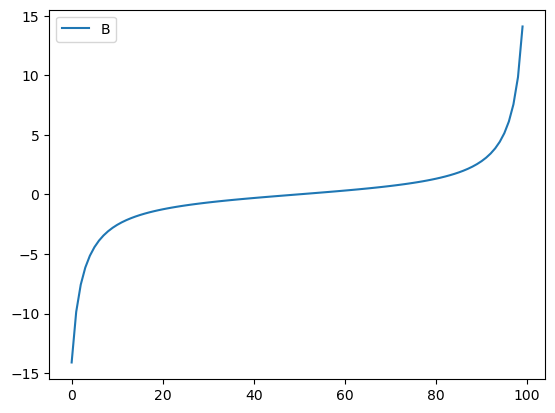

In [190]:
f = np.tan 
_df.eval('B=@f(A)').plot(y='B') # 그래서 이게 정석임..

# 4. Pandas -- Multi-Index의 이해 

## A. 원래 `df`, `s`는 딕셔너리 계열임 

`-` 예시1: df는 dct에서 만들수 있음

In [207]:
dct = {'A': [1,2,3],'B': [2,3,4]}
df = pd.DataFrame(dct)
df

,A,B
0,1,2
1,2,3
2,3,4


In [201]:
df['A']

0    1
1    2
2    3
Name: A, dtype: int64

`-` 예시2: s도 dct에서 만들수 있음

In [205]:
dct = {'43052': 80, '43053': 90, '43054': 50}
s = pd.Series(dct)
s

43052    80
43053    90
43054    50
dtype: int64

In [206]:
s['43052']

80

`-` 예시3: dict의 키로 올수 있는것들? 

- ref: <https://guebin.github.io/PP2023/posts/01_PythonBasic/2023-03-29-4wk-2.html>

튜플로 dct를 만든다면?

In [213]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s

43052  4    80
43053  1    90
43054  2    50
dtype: int64

In [214]:
dct[('43052',4)]

80

In [215]:
s[('43052',4)]

80

In [216]:
s.index

MultiIndex([('43052', 4),
            ('43053', 1),
            ('43054', 2)],
           )

## B. `.index` 혹은 `.columns`에 `name`이 있는 경우 

`예시1`: index에 이름이 있는 경우 `['id']`

In [242]:
dct = {'43052': 80, '43053': 90, '43054': 50}
s = pd.Series(dct)
s

43052    80
43053    90
43054    50
dtype: int64

In [252]:
s.rename_axis(['id'])

id
43052    80
43053    90
43054    50
dtype: int64

In [253]:
s.index, s.rename_axis(['id']).index,

(Index(['43052', '43053', '43054'], dtype='object'),
 Index(['43052', '43053', '43054'], dtype='object', name='id'))

`#`

`예시2`: index에 이름이 있는 경우 `['id','year']`

In [254]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s.rename_axis(['id','year'])

id     year
43052  4       80
43053  1       90
43054  2       50
dtype: int64

In [255]:
s.rename_axis(['id','year']).index

MultiIndex([('43052', 4),
            ('43053', 1),
            ('43054', 2)],
           names=['id', 'year'])

`#`

`예시3`: 예시2가 데이터프레임이라면 이렇게 보인다

In [259]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
df = pd.DataFrame(s.rename_axis(['id','year']))
df

,,0
id,year,
43052,4,80
43053,1,90
43054,2,50


In [261]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [262]:
df.index

MultiIndex([('43052', 4),
            ('43053', 1),
            ('43054', 2)],
           names=['id', 'year'])

`#`

`예시4`: 심슨의 역설 -- 전체

In [266]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index='gender', columns='result', values='count', aggfunc=sum)
df

/tmp/ipykernel_2278789/2316601964.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\


result,fail,pass
gender,,
female,1063,772
male,1291,1400


In [269]:
df.index,df.columns

(Index(['female', 'male'], dtype='object', name='gender'),
 Index(['fail', 'pass'], dtype='object', name='result'))

1열과 2열을 더하고 싶다면? 단순히 아래와 같이 하면 된다. (여기에서 `gender`,`result`는 각각 index 의 이름, columns의 이름일 뿐이므로 신경쓸 필요 없음)

In [270]:
df['fail']+df['pass']

gender
female    1835
male      2691
dtype: int64

`#`

`예시5`: 심슨의 역설 -- 학과별

In [281]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df 

/tmp/ipykernel_2278789/2434963071.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\


result             fail  pass
gender department            
female A             19    89
       B              7    18
       C            391   202
       D            244   131
       E            299    94
       F            103   238
male   A            314   511
       B            208   352
       C            204   121
       D            279   138
       E            137    54
       F            149   224

In [277]:
df.index, df.columns

(MultiIndex([('female', 'A'),
             ('female', 'B'),
             ('female', 'C'),
             ('female', 'D'),
             ('female', 'E'),
             ('female', 'F'),
             (  'male', 'A'),
             (  'male', 'B'),
             (  'male', 'C'),
             (  'male', 'D'),
             (  'male', 'E'),
             (  'male', 'F')],
            names=['gender', 'department']),
 Index(['fail', 'pass'], dtype='object', name='result'))

학과별 합격률을 알고 싶다면? 

In [288]:
df.assign(rate = df['pass']/df.sum(axis=1))

result             fail  pass      rate
gender department                      
female A             19    89  0.824074
       B              7    18  0.720000
       C            391   202  0.340641
       D            244   131  0.349333
       E            299    94  0.239186
       F            103   238  0.697947
male   A            314   511  0.619394
       B            208   352  0.628571
       C            204   121  0.372308
       D            279   138  0.330935
       E            137    54  0.282723
       F            149   224  0.600536

`#`

# 5. Pandas -- tidydata 

## A. tidydata의 개념 

`-` 아래의 자료는 불리하다. (뭐가??)

In [289]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df 

/tmp/ipykernel_2278789/2434963071.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\


result             fail  pass
gender department            
female A             19    89
       B              7    18
       C            391   202
       D            244   131
       E            299    94
       F            103   238
male   A            314   511
       B            208   352
       C            204   121
       D            279   138
       E            137    54
       F            149   224

`-` 가정1: 만약에 A학과에 해당하는 결과만 뽑고 싶다면? --> departmet가 column으로 있어야함.. 

`-` 가정2: 이 데이터를 바탕으로 합격한사람만 bar plot을 그리고 싶다면? --> department, gender, pass 가 column으로 있어야함.. 

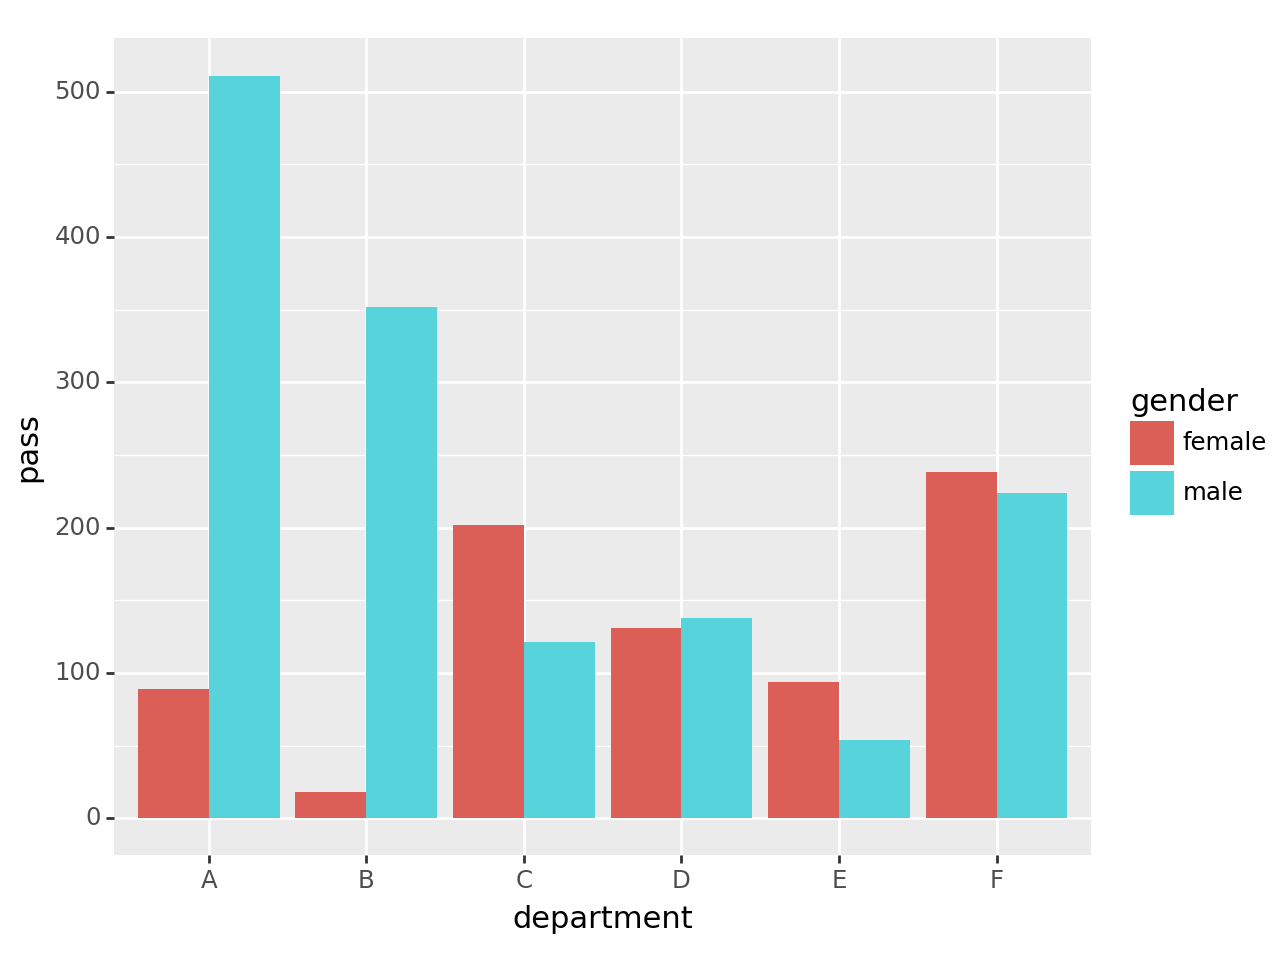

<Figure Size: (640 x 480)>

In [296]:
#

`-` tidydata 정의: <https://r4ds.had.co.nz/tidy-data.html>

1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.


## B. tidydata가 아닌 예시

`예시1` -- MultiIndex 구조를 가지면 무조건 tidydata가 아니다.

In [322]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df 

/tmp/ipykernel_2278789/2434963071.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


result             fail  pass
gender department            
female A             19    89
       B              7    18
       C            391   202
       D            244   131
       E            299    94
       F            103   238
male   A            314   511
       B            208   352
       C            204   121
       D            279   138
       E            137    54
       F            149   224

- 이건 tidydata가 아니고 

In [328]:
tidydata = df.stack().reset_index().rename({0:'applicant_count'},axis=1)
tidydata 

,gender,department,result,applicant_count
0,female,A,fail,19
1,female,A,pass,89
2,female,B,fail,7
3,female,B,pass,18
4,female,C,fail,391
5,female,C,pass,202
6,female,D,fail,244
7,female,D,pass,131
8,female,E,fail,299
9,female,E,pass,94


- 이것이 tidydata 

`-` 구분하는 방법1: 직관에 의한 설명

- query쓰기 불편: 남성지원자만 뽑고 싶다면?, 학과A만 뽑고싶다면? 탈락한지원자만 뽑고싶다면? 학과A에서 탈락한 지원자만 뽑고싶다면??
- 시각화하기 불편: 
- 하여튼 다루기 불편해.. 

`-` 구분하는 방법2: 정의에 의한 설명 

- `df`는 원칙 1에 위배된다. (왜냐하면 `gender`, `department`,`result`,`applicant_count`에 해당하는 변수는 하나의 컬럼을 차지하지 못함)
- `df`는 원칙 2에 위배된다. (왜냐하면 하나의 행에 2개의 `applicant_count` observation이 존재함)

`#`

`예시2` -- 아래의 자료는 tidydata가 아니다. 

In [320]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index='gender', columns='result', values='count', aggfunc=sum)\
.assign(pass_fail = lambda df: list(map(lambda x,y: (y,x),df['fail'],df['pass']))).drop(['fail','pass'],axis=1).reset_index()
df

/tmp/ipykernel_2278789/2865855793.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


result,gender,pass_fail
0,female,"(772, 1063)"
1,male,"(1400, 1291)"


- 이 `df`는 원칙 3에 위배된다. 

`#`

`# 예시3` -- wide df 

In [329]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


- 이건 tidydata 가 아니고

In [357]:
tidydata = df.melt(id_vars='Date').assign(Date = lambda _df: _df.Date.apply(pd.to_datetime))
tidydata

,Date,variable,value
0,2019-10-01,Samsung,461
1,2019-11-01,Samsung,461
2,2019-12-01,Samsung,426
3,2020-01-01,Samsung,677
4,2020-02-01,Samsung,593
...,...,...,...
203,2020-06-01,Asus,16
204,2020-07-01,Asus,12
205,2020-08-01,Asus,20
206,2020-09-01,Asus,15


- 이건 tidydata 이다. 

`-` df를 가지고 아래와 같은 그림을 그릴 수 있겠어? 

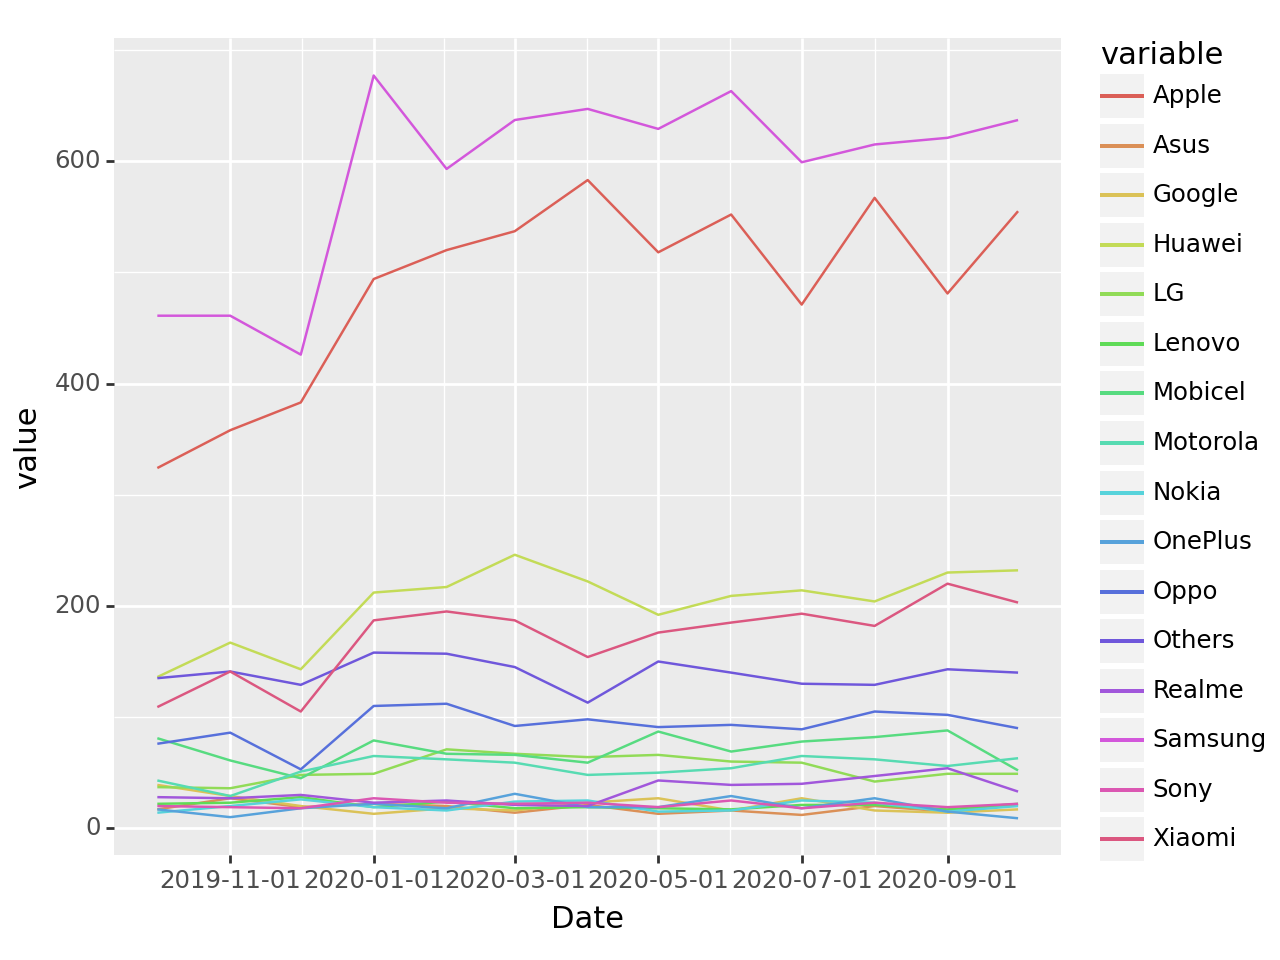

<Figure Size: (640 x 480)>

In [361]:
#

# 6. Pandas -- `melt`/`stack`

## A. `reset_index()`

> 중첩구조를 가지는 series일 경우 `.reset_index()`를 사용하면 쉽게 tidydata를 얻을 수 있다. 

`-` 예시1

In [376]:
dct = {'43052': 80, '43053': 90, '43054': 50}
s = pd.Series(dct)
s

43052    80
43053    90
43054    50
dtype: int64

In [377]:
s.reset_index()

,index,0
0,43052,80
1,43053,90
2,43054,50


`-` 예시2

In [382]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s

43052  4    80
43053  1    90
43054  2    50
dtype: int64

In [383]:
s.reset_index()

,level_0,level_1,0
0,43052,4,80
1,43053,1,90
2,43054,2,50


`-` 예시3

In [394]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).stack().stack()
df

A  fail  male      314
         female     19
   pass  male      511
         female     89
B  fail  male      208
         female      7
   pass  male      352
         female     18
C  fail  male      204
         female    391
   pass  male      121
         female    202
D  fail  male      279
         female    244
   pass  male      138
         female    131
E  fail  male      137
         female    299
   pass  male       54
         female     94
F  fail  male      149
         female    103
   pass  male      224
         female    238
dtype: int64

In [395]:
df.reset_index()

,level_0,level_1,level_2,0
0,A,fail,male,314
1,A,fail,female,19
2,A,pass,male,511
3,A,pass,female,89
4,B,fail,male,208
5,B,fail,female,7
6,B,pass,male,352
7,B,pass,female,18
8,C,fail,male,204
9,C,fail,female,391


`-` 예시4 -- `.reset_index()` 는 말그대로 index를 reset 하는 명령어, 꼭 `pd.Series`에만 쓰는건 아니다. 

In [396]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).stack()
df

male  female
A fail   314      19
  pass   511      89
B fail   208       7
  pass   352      18
C fail   204     391
  pass   121     202
D fail   279     244
  pass   138     131
E fail   137     299
  pass    54      94
F fail   149     103
  pass   224     238

In [397]:
df.reset_index()

,level_0,level_1,male,female
0,A,fail,314,19
1,A,pass,511,89
2,B,fail,208,7
3,B,pass,352,18
4,C,fail,204,391
5,C,pass,121,202
6,D,fail,279,244
7,D,pass,138,131
8,E,fail,137,299
9,E,pass,54,94


## B. `melt()`

`# 예시1`: 아래의 자료를 tidydata로 만들라. 

In [391]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


(풀이1) `.melt()` -- 실패

In [392]:
df.melt() # 실패

,variable,value
0,Date,2019-10
1,Date,2019-11
2,Date,2019-12
3,Date,2020-01
4,Date,2020-02
...,...,...
216,Asus,16
217,Asus,12
218,Asus,20
219,Asus,15


(풀이2) `.melt(id_vars=)` -- 성공

In [393]:
df.melt(id_vars='Date') # 성공

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


`#`

## C. `stack()` + `reset_index()`

> 제 최애테크닉: DataFrame을 MultiIndex를 가지는 Series로 "일부러" 변환하고 reset_index()를 시킴

`# 예시1`: 아래의 자료를 tidydata로 만들라. 

In [399]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


In [404]:
df.set_index('Date').stack()

Date            
2019-10  Samsung    461
         Apple      324
         Huawei     136
         Xiaomi     109
         Oppo        76
                   ... 
2020-10  Nokia       20
         Lenovo      22
         OnePlus      9
         Sony        22
         Asus        21
Length: 208, dtype: int64

In [405]:
df.set_index('Date').stack().reset_index()

,Date,level_1,0
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


`#`

`# 예시2`: 아래의 자료를 tidydata로 만들어라. 

In [407]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])
df

male      female     
  fail pass   fail pass
A  314  511     19   89
B  208  352      7   18
C  204  121    391  202
D  279  138    244  131
E  137   54    299   94
F  149  224    103  238

In [410]:
df.stack().stack().reset_index()

,level_0,level_1,level_2,0
0,A,fail,male,314
1,A,fail,female,19
2,A,pass,male,511
3,A,pass,female,89
4,B,fail,male,208
5,B,fail,female,7
6,B,pass,male,352
7,B,pass,female,18
8,C,fail,male,204
9,C,fail,female,391


`#`

## D. `unstack() + reset_index()`

`# 예시1` -- `.stack()`과 `.unstack()`은 반대연산 

In [415]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

/tmp/ipykernel_2278789/3693914824.py:2: FutureWarning: The provided callable <function mean at 0x7f30a00b4310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
/tmp/ipykernel_2278789/3693914824.py:2: FutureWarning: The provided callable <function mean at 0x7f30a00b4310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

In [418]:
df.stack()

CANCELLED     DIVERTED
AIRLINE WEEKDAY                                
AA      1       mean      0.032106     0.004699
                count  1277.000000  1277.000000
        2       mean      0.007341     0.001631
                count  1226.000000  1226.000000
        3       mean      0.011949     0.001494
...                            ...          ...
WN      5       count  1201.000000  1201.000000
        6       mean      0.010132     0.003040
                count   987.000000   987.000000
        7       mean      0.006066     0.002600
                count  1154.000000  1154.000000

[196 rows x 2 columns]

In [417]:
df.unstack()

CANCELLED                                                              \
             mean                                                               
WEEKDAY         1         2         3         4         5         6         7   
AIRLINE                                                                         
AA       0.032106  0.007341  0.011949  0.015004  0.014151  0.018667  0.021837   
AS       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
B6       0.000000  0.012658  0.000000  0.000000  0.000000  0.000000  0.000000   
DL       0.006068  0.005208  0.005131  0.001940  0.001982  0.003195  0.001294   
EV       0.034130  0.023918  0.022910  0.026895  0.013111  0.022504  0.030233   
F9       0.016129  0.005376  0.000000  0.000000  0.005155  0.011050  0.015625   
HA       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
MQ       0.086785  0.032819  0.025145  0.039146  0.028000  0.038356  0.055777   
NK       0.035354  0.013158  0.013953  0.013216  0.012821  0.019900  0.009390   
OO       0.030581  0.011156  0.014478  0.013627  0.026399  0.024125  0.031385   
UA       0.018914  0.017498  0.007799  0.007719  0.010195  0.006682  0.013487   
US       0.026906  0.018018  0.004545  0.003953  0.009050  0.004695  0.022814   
VX       0.007194  0.000000  0.000000  0.014184  0.006667  0.000000  0.014815   
WN       0.012708  0.019562  0.014118  0.007911  0.005828  0.010132  0.006066   

                           ...  DIVERTED                                  \
        count              ...      mean                     count         
WEEKDAY     1     2     3  ...         5         6         7     1     2   
AIRLINE                    ...                                             
AA       1277  1226  1339  ...  0.000786  0.008000  0.000753  1277  1226   
AS        118   106   115  ...  0.000000  0.000000  0.000000   118   106   
B6         70    79    78  ...  0.000000  0.016667  0.011364    70    79   
DL       1648  1536  1559  ...  0.001982  0.003195  0.002587  1648  1536   
EV        879   878   873  ...  0.002384  0.001406  0.002326   879   878   
F9        186   186   192  ...  0.000000  0.000000  0.005208   186   186   
HA         19    19    19  ...  0.000000  0.000000  0.000000    19    19   
MQ        507   518   517  ...  0.000000  0.000000  0.000000   507   518   
NK        198   228   215  ...  0.000000  0.004975  0.004695   198   228   
OO        981   986   967  ...  0.004224  0.002413  0.003247   981   986   
UA       1216  1143  1154  ...  0.001699  0.002227  0.003854  1216  1143   
US        223   222   220  ...  0.000000  0.000000  0.000000   223   222   
VX        139   130   183  ...  0.000000  0.000000  0.007407   139   130   
WN       1259  1278  1275  ...  0.000000  0.003040  0.002600  1259  1278   

                                       
                                       
WEEKDAY     3     4     5     6     7  
AIRLINE                                
AA       1339  1333  1272  1125  1328  
AS        115   110   109   103   107  
B6         78    84    84    60    88  
DL       1559  1546  1514  1252  1546  
EV        873   818   839   711   860  
F9        192   186   194   181   192  
HA         19    15    11    12    17  
MQ        517   562   500   365   502  
NK        215   227   234   201   213  
OO        967   954   947   829   924  
UA       1154  1166  1177   898  1038  
US        220   253   221   213   263  
VX        183   141   150   115   135  
WN       1275  1264  1201   987  1154  

[14 rows x 28 columns]

In [419]:
df.unstack().stack()

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

In [420]:
df.stack().unstack()

CANCELLED          DIVERTED        
                     mean   count      mean   count
AIRLINE WEEKDAY                                    
AA      1        0.032106  1277.0  0.004699  1277.0
        2        0.007341  1226.0  0.001631  1226.0
        3        0.011949  1339.0  0.001494  1339.0
        4        0.015004  1333.0  0.003751  1333.0
        5        0.014151  1272.0  0.000786  1272.0
...                   ...     ...       ...     ...
WN      3        0.014118  1275.0  0.001569  1275.0
        4        0.007911  1264.0  0.003165  1264.0
        5        0.005828  1201.0  0.000000  1201.0
        6        0.010132   987.0  0.003040   987.0
        7        0.006066  1154.0  0.002600  1154.0

[98 rows x 4 columns]

`#`

`# 예시2` -- 아래의 자료를 tidydata로 만들라. 

In [421]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

/tmp/ipykernel_2278789/3693914824.py:2: FutureWarning: The provided callable <function mean at 0x7f30a00b4310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
/tmp/ipykernel_2278789/3693914824.py:2: FutureWarning: The provided callable <function mean at 0x7f30a00b4310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

(풀이1)

In [426]:
df.stack().stack().reset_index()

,AIRLINE,WEEKDAY,level_2,level_3,0
0,AA,1,mean,CANCELLED,0.032106
1,AA,1,mean,DIVERTED,0.004699
2,AA,1,count,CANCELLED,1277.000000
3,AA,1,count,DIVERTED,1277.000000
4,AA,2,mean,CANCELLED,0.007341
...,...,...,...,...,...
387,WN,6,count,DIVERTED,987.000000
388,WN,7,mean,CANCELLED,0.006066
389,WN,7,mean,DIVERTED,0.002600
390,WN,7,count,CANCELLED,1154.000000


(풀이2)

In [428]:
df.unstack().unstack().reset_index()

,level_0,level_1,WEEKDAY,AIRLINE,0
0,CANCELLED,mean,1,AA,0.032106
1,CANCELLED,mean,1,AS,0.000000
2,CANCELLED,mean,1,B6,0.000000
3,CANCELLED,mean,1,DL,0.006068
4,CANCELLED,mean,1,EV,0.034130
...,...,...,...,...,...
387,DIVERTED,count,7,OO,924.000000
388,DIVERTED,count,7,UA,1038.000000
389,DIVERTED,count,7,US,263.000000
390,DIVERTED,count,7,VX,135.000000


`예시3` -- 아래의 자료를 tidydata로 만들어라. 

In [430]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])
df

male      female     
  fail pass   fail pass
A  314  511     19   89
B  208  352      7   18
C  204  121    391  202
D  279  138    244  131
E  137   54    299   94
F  149  224    103  238

(풀이1)

In [433]:
df.stack().stack().reset_index()

,level_0,level_1,level_2,0
0,A,fail,male,314
1,A,fail,female,19
2,A,pass,male,511
3,A,pass,female,89
4,B,fail,male,208
5,B,fail,female,7
6,B,pass,male,352
7,B,pass,female,18
8,C,fail,male,204
9,C,fail,female,391


(풀이2)

In [436]:
df.unstack().reset_index()

,level_0,level_1,level_2,0
0,male,fail,A,314
1,male,fail,B,208
2,male,fail,C,204
3,male,fail,D,279
4,male,fail,E,137
5,male,fail,F,149
6,male,pass,A,511
7,male,pass,B,352
8,male,pass,C,121
9,male,pass,D,138


# 7. HW